In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## 1. Descriptive Statistics
Use a dataset : Iris Dataset. Perform the following tasks:    
 a. Compute the mean, median, and standard deviation for all numerical       features.  
 
 b. Create histograms and boxplots for feature distributions.
 
 c. Calculate the correlation matrix for the features.
 
 d. Interpret which features are most correlated with each other.

In [9]:
df=load_iris()
df = pd.DataFrame(data=df.data, columns=df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
print(f"Mean:\n{df.mean()}\n\nMedian:\n{df.median()}\n\nStandard deviation:\n{df.std()}\n")

Mean:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Standard deviation:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64



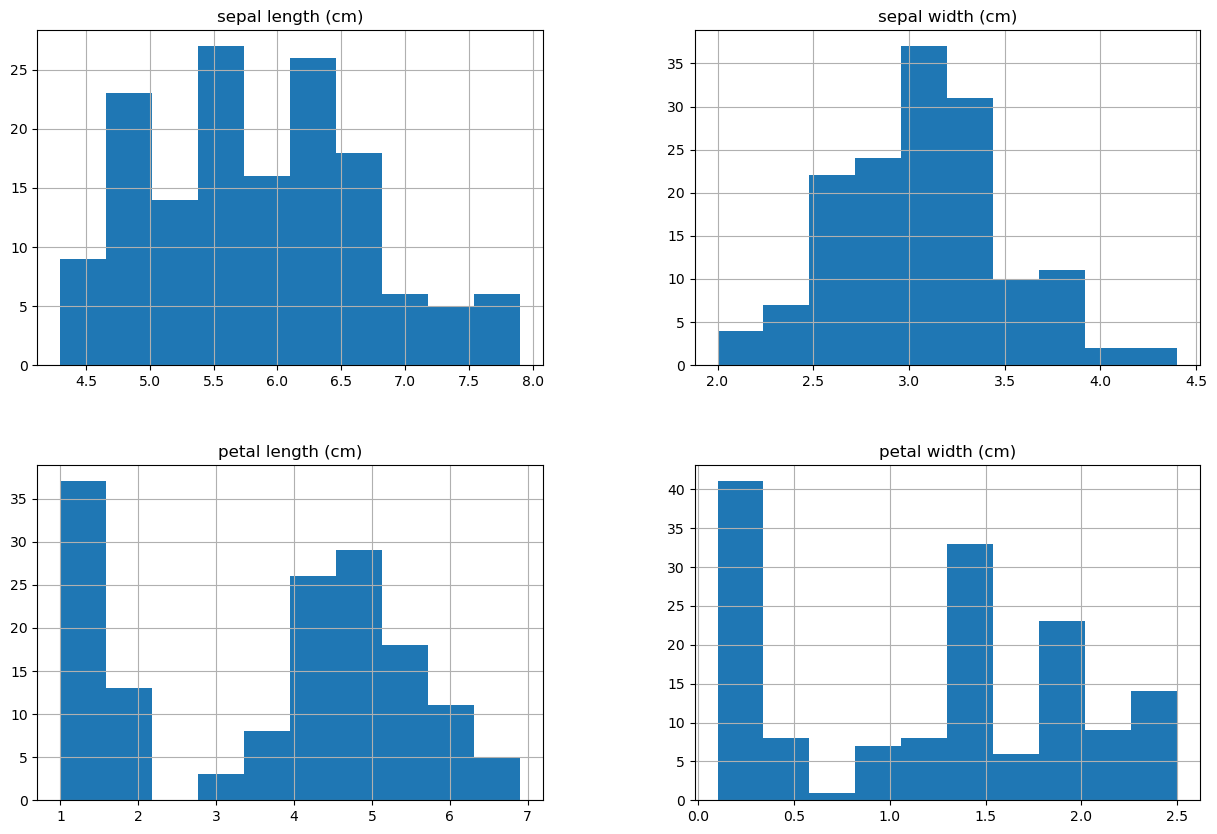

In [46]:
df.hist(bins=10,figsize=(15,10))
plt.show()

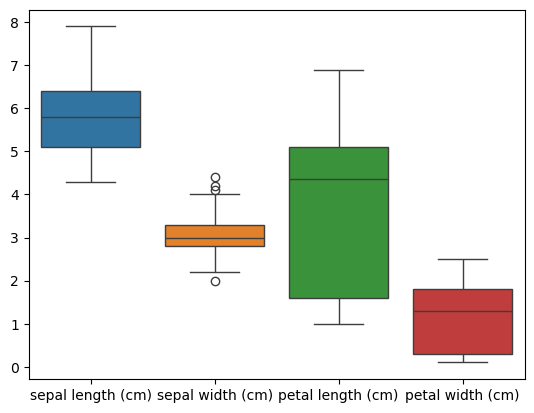

In [55]:
sns.boxplot(df)
plt.show()

In [57]:
corr_mat=df.corr()
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


We know:
* Correlation ranges from -1 to 1
* corelation nearer to 1=positive correlation
* corelation further to -1=negative correlation

Since corelation between petal length and petal width is the greatest among all,Hence petal length and petal width are most correlated to each other i.e. when petal length increases,petal width also increases and vice versa.

## 2. Conditional Probability
Given the following table of events, compute P(A∣B) and P(B∣A)
|           |     B       |   not B         |
|-----------|-------------|-----------------|
|   A       |   30        |      20         |
|   not A   |   50        |     100         |



In [69]:
na=30+20
nb=30+50
n_a_and_b=30
total=30+20+50+100

pa=na/total
pb=nb/total
p_a_and_b=n_a_and_b/total

p_a_b=p_a_and_b/pb
p_b_a=p_a_and_b/pa
print(f"P(A|B)={p_a_b}\nP(B|A)={p_b_a}")

P(A|B)=0.37499999999999994
P(B|A)=0.6


## 3. Bayes' Theorem
A model classifies spam emails with the following probabilities:

    P(Spam)=0.2
    P(Not Spam)=0.8
    P(Keyword | Spam)=0.7
    P(Keyword | Not Spam)=0.1

Compute the probability that an email is spam given that it contains the keyword.


__Bayes Theorem:__
P(A|B)=$\frac{P(B|A).P(A)}{P(B)}$

In [7]:
#spam=a
#keywoard=b

#p(a)=0.2
p_a=0.2
#p(not a)=0.8
p_nota=0.8
#p(b|a)=0.7
p_ba=0.7
#p(b|not a)=0.1
p_bnota=0.1
#p(a|b)=?

p_b=p_ba*p_a+p_bnota*p_nota    #Law of total probability
p_ab=(p_ba*p_a)/p_b
print("The probability of an email is spam given that it contains the keyword is:",p_ab)

The probability of an email is spam given that it contains the keyword is: 0.6363636363636362


## 4. Outlier Detection, Removal, and Feature Scaling
Choose a dataset on your own and perform the following operation
 *  Compute Q1 (25th percentile) and Q3 (75th percentile) for each feature.
 *  Calculate the IQR (IQR=Q3−Q1).
 *  Define outliers as values outside the range [Q1−1.5⋅IQR,Q3+1.5⋅IQR].
 *  Create a function to detect and remove outliers for all numerical features.
 *  Plot boxplots of features before and after outlier removal.  
 *  Plot histograms of a few features before and after applying normalization and standardization.

In [10]:
df=pd.read_csv('./housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
"""
df=df.drop(columns=["longitude","latitude"])
df.to_csv("updated_file",index=False)
df.head(5)
"""

'\ndf=df.drop(columns=["longitude","latitude"])\ndf.to_csv("updated_file",index=False)\ndf.head(5)\n'

In [29]:
df=df[["population", "total_rooms"]]
df.head(5)

,population,total_rooms
0,322.0,880.0
1,2401.0,7099.0
2,496.0,1467.0
3,558.0,1274.0
4,565.0,1627.0


In [45]:
q1=df[['population','total_rooms']].quantile(0.25)
q3=df[['population','total_rooms']].quantile(0.75)
print(f"For Population: \n Q1={q1.population} , Q3={q3.population} and IQR={q3.population-q1.population}")
print(f"For Total rooms: \n Q1={q1.total_rooms} , Q3={q3.total_rooms} and IQR={q3.total_rooms-q1.total_rooms}")

For Population: 
 Q1=787.0 , Q3=1725.0 and IQR=938.0
For Total rooms: 
 Q1=1447.75 , Q3=3148.0 and IQR=1700.25


In [112]:
def outlier_remover(pa,pb,ta,tb,df):
    new_df=df[(df['population']>=pa)&(df['population']<=pb)&(df['total_rooms']>=ta)&(df['total_rooms']<=tb)]
    return new_df

In [113]:
#range=[Q1−1.5⋅IQR,Q3+1.5⋅IQR]

p_a=q1.population-1.5*(q3.population-q1.population)
p_b=q3.population+1.5*(q3.population-q1.population)

t_a=q1.total_rooms-1.5*(q3.total_rooms-q1.total_rooms)
t_b=q3.total_rooms+1.5*(q3.total_rooms-q1.total_rooms)

df2=outlier_remover(p_a,p_b,t_a,t_b,df)
df2

,population,total_rooms
0,322.0,880.0
2,496.0,1467.0
3,558.0,1274.0
4,565.0,1627.0
5,413.0,919.0
...,...,...
20635,845.0,1665.0
20636,356.0,697.0
20637,1007.0,2254.0
20638,741.0,1860.0


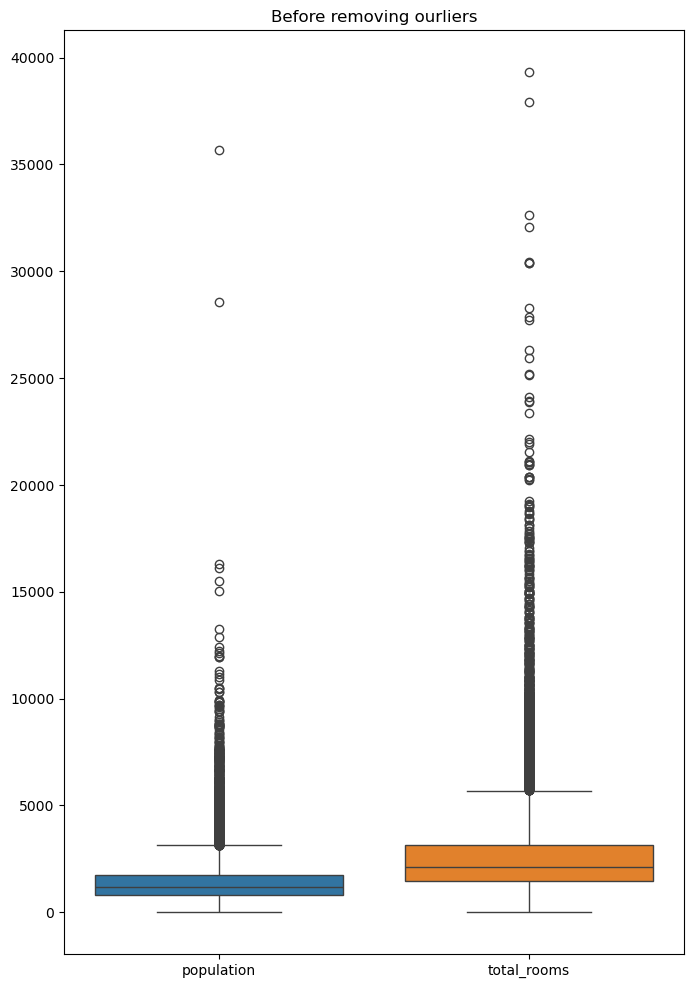

In [116]:
plt.figure(figsize=(8,12))
plt.title("Before removing outliers")
sns.boxplot(df)
plt.show()

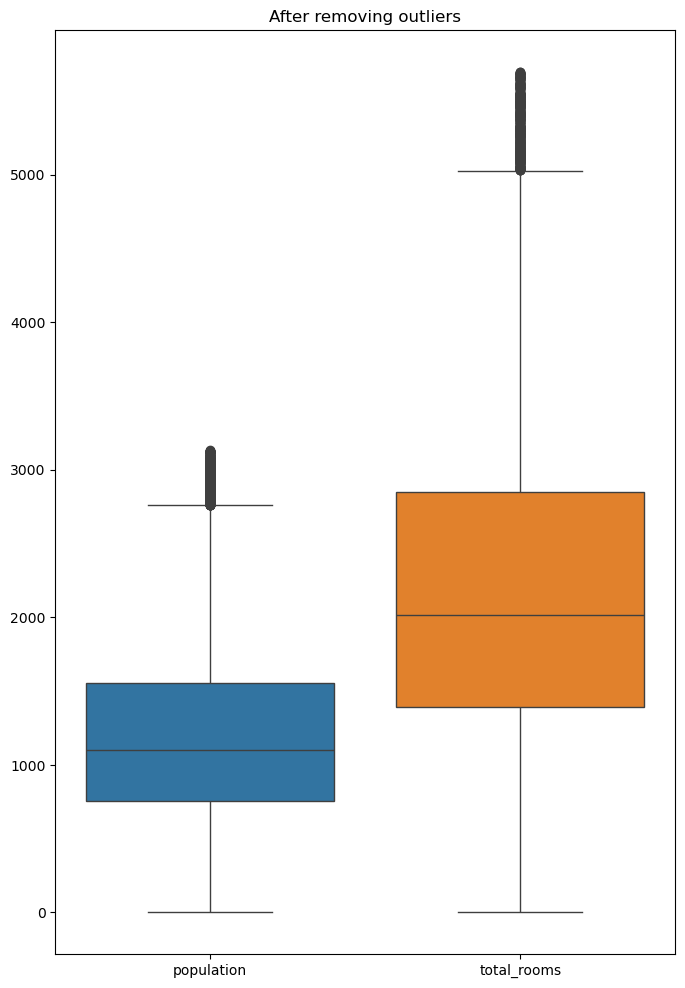

In [117]:
plt.figure(figsize=(8,12))
plt.title("After removing outliers")
sns.boxplot(df2)
plt.show()

Before standarization and Normalization


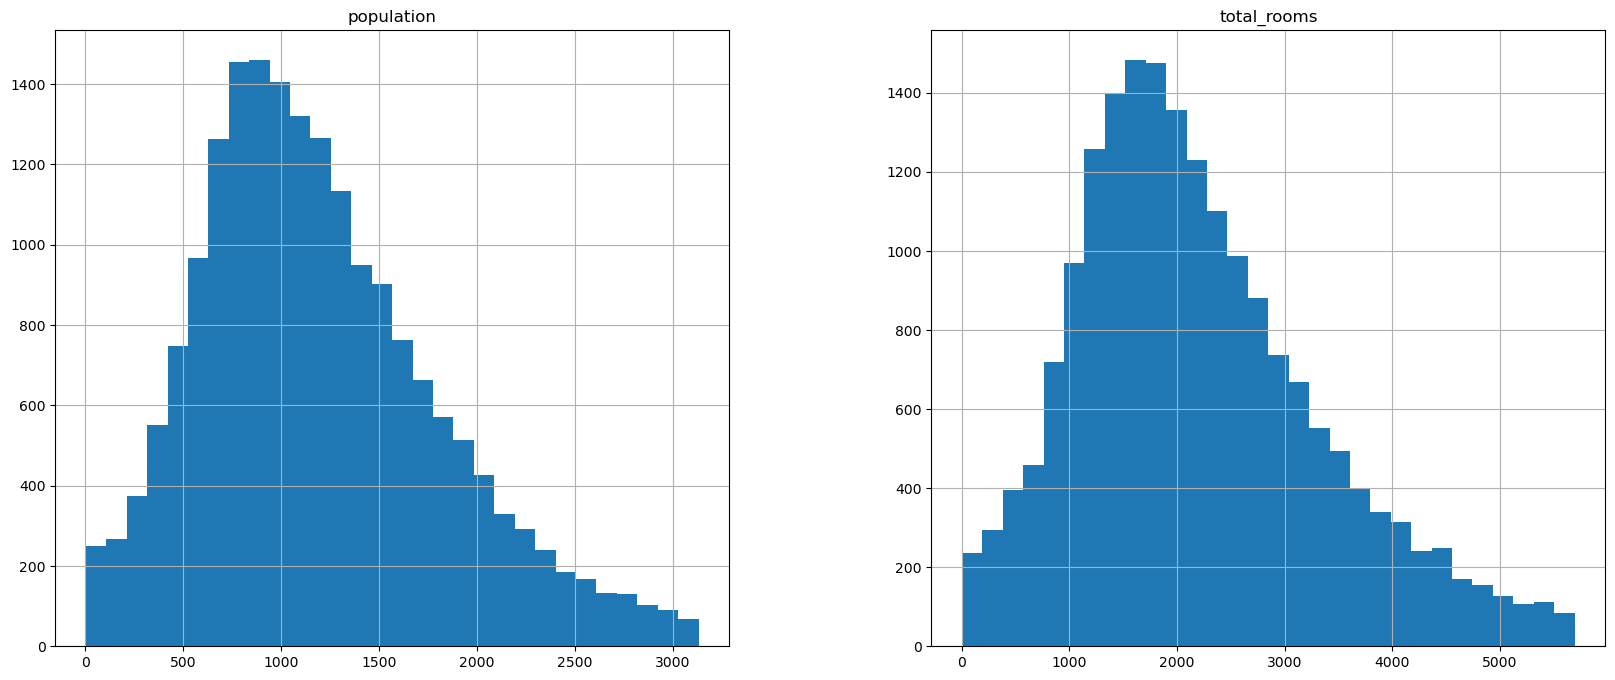

In [163]:
print("Before standarization and Normalization")
df2.hist(bins=30,figsize=(20,8))
plt.show()

After standarization and Normalization


array([[<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'total_rooms'}>]], dtype=object)

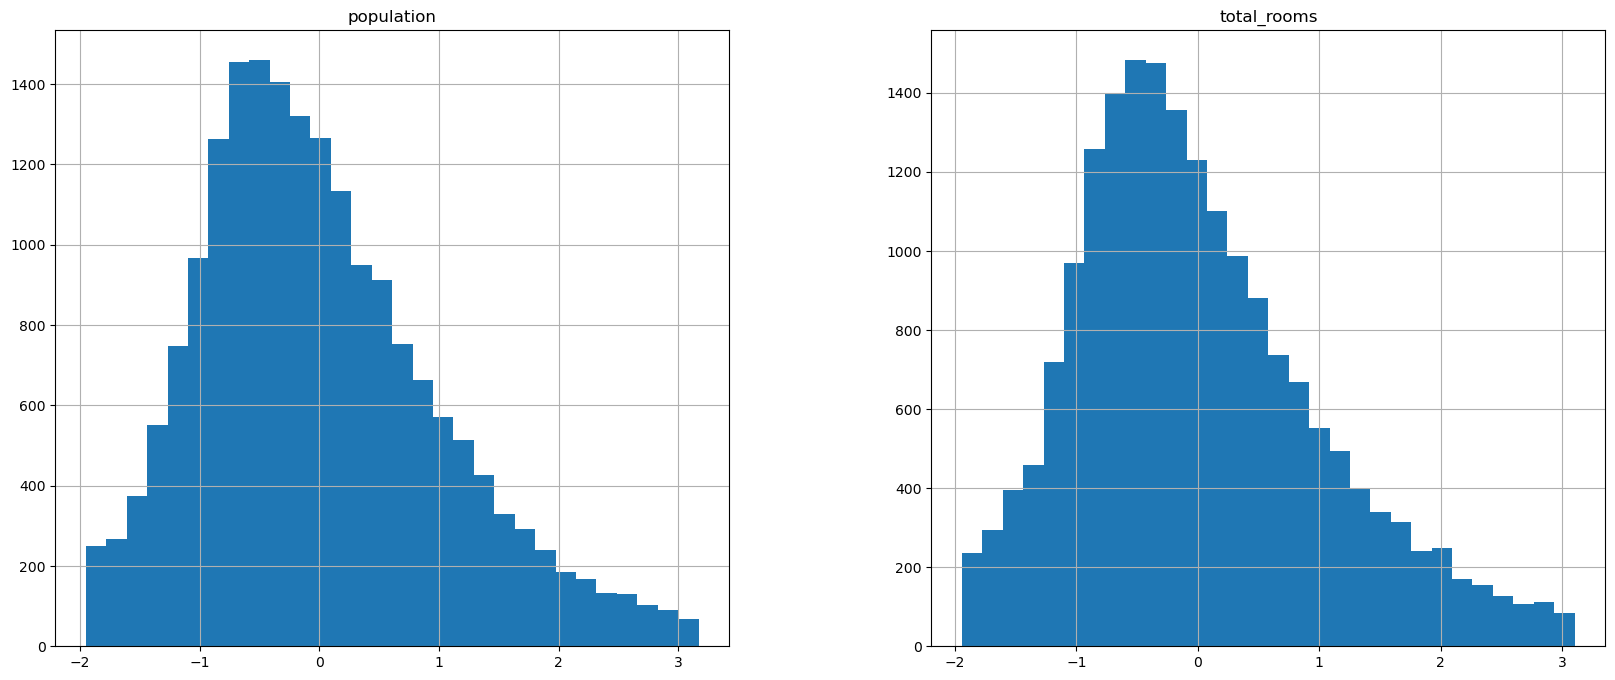

In [172]:
from sklearn import preprocessing
print("After standarization and Normalization")
df3=pd.DataFrame(preprocessing.scale(df2),columns=['population','total_rooms'])
df3.hist(bins=30,figsize=(20,8))